## Desafío - Regresión desde la econometría
### Cristian Vidal

### Desafío 1: Prepare el ambiente de trabajo

 * Importe las librerías básicas para el análisis de datos.
 * Incluya los import base de statsmodels

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
plt.style.use('seaborn-whitegrid') # Gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (6, 4) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 300 # resolución gráficos

* Importe la base de datos Credit.csv y elimine la columna Unnamed: 0

In [2]:
df = pd.read_csv('Credit.csv')
df = df.drop(columns="Unnamed: 0")
df.sample(10)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
252,72.945,8603,621,3,64,8,Female,No,No,Caucasian,1355
374,29.400,4840,368,3,76,18,Female,No,Yes,Caucasian,588
332,62.328,5228,377,3,83,15,Male,No,No,Caucasian,380
73,23.989,4523,338,4,31,15,Male,No,No,Caucasian,601
356,34.480,6090,442,3,36,14,Male,No,No,Caucasian,962
362,26.162,5101,382,3,62,19,Female,No,No,African American,710
106,16.819,1337,115,2,74,15,Male,No,Yes,Asian,0
110,34.537,3271,250,3,57,17,Female,No,Yes,Asian,47
162,63.809,7530,515,1,56,12,Male,No,Yes,Caucasian,1086
112,46.007,6637,491,4,42,14,Male,No,Yes,Caucasian,1046


* Siguiendo las buenas prácticas, genere variables binarias para capturar el efecto del grupo minoritario en cada variable. Para el caso de <b>Ethnicity</b> , genere binarias para <b>AfricanAmerican</b> y <b>Asian</b> .
    * tip: Utilice value_counts() para revisar la cantidad de casos en las variables categóricas

In [3]:
df.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [4]:
df.dtypes

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object

In [5]:
 columnas_categoricas = ['Gender', 'Student', 'Married', 'Ethnicity']

# iniciamos un loop para cada variable categórica donde:
for variable in columnas_categoricas:
    # imprimimos el nombre
    print(variable)
    # solicitamos la frecuencia relativa de cada categoría dentro de la variable
    print(df[variable].value_counts())
    # solicitamos el porcentaje de la frecuencia relativa
    print(df[variable].value_counts('%'))
    print('**************************************************************')

Gender
Female    207
 Male     193
Name: Gender, dtype: int64
Female    0.5175
 Male     0.4825
Name: Gender, dtype: float64
**************************************************************
Student
No     360
Yes     40
Name: Student, dtype: int64
No     0.9
Yes    0.1
Name: Student, dtype: float64
**************************************************************
Married
Yes    245
No     155
Name: Married, dtype: int64
Yes    0.6125
No     0.3875
Name: Married, dtype: float64
**************************************************************
Ethnicity
Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64
Caucasian           0.4975
Asian               0.2550
African American    0.2475
Name: Ethnicity, dtype: float64
**************************************************************


In [6]:
df['Gender_binarize'] = np.where(df.Gender.str.strip() == 'Male', 1, 0)
df['Student_binarize'] = np.where(df.Student.str.strip() == 'Yes', 1, 0)
df['Married_binarize'] = np.where(df.Married.str.strip() == 'Yes', 1, 0)
df['AfricanAmerican_binarize'] = np.where(df.Ethnicity.str.strip() == 'African American', 1, 0)
df['Asian_binarize'] = np.where(df.Ethnicity.str.strip() == 'Asian', 1, 0)
df.sample(20)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Gender_binarize,Student_binarize,Married_binarize,AfricanAmerican_binarize,Asian_binarize
321,25.078,3096,236,2,27,15,Female,No,Yes,Caucasian,81,0,0,1,0,0
198,27.349,2000,169,4,51,16,Female,No,Yes,African American,0,0,0,1,1,0
344,48.218,5199,401,7,39,10,Male,No,Yes,Asian,633,1,0,1,0,1
150,63.931,5728,435,3,28,14,Female,No,Yes,African American,581,0,0,1,1,0
383,14.292,3274,282,9,64,9,Male,No,Yes,Caucasian,382,1,0,1,0,0
319,27.590,2586,229,5,54,16,Male,No,Yes,African American,0,1,0,1,1,0
139,107.841,10384,728,3,87,7,Male,No,No,African American,1597,1,0,0,1,0
173,14.887,4745,339,3,58,12,Male,No,Yes,African American,724,1,0,1,1,0
307,75.406,3874,298,3,41,14,Female,No,Yes,Asian,0,0,0,1,0,1
158,42.357,5550,406,2,83,12,Female,No,Yes,Asian,653,0,0,1,0,1


### Desafío 2: Genere gráficos descriptivos para las variables contínuas

* Genere una función llamada plot_hist que genere un histograma de la variable e indique la media y mediana de la misma. Agrege una legenda para indicar qué representa cada línea.

In [7]:
def plot_hist(dataframe, plot_var):
    """
    crear_dotplot:
        Función que permite crear un histograma
    parameters:
        dataframe : objeto DataFrame
        plot_var : La variable a analizar y extraer las media y mediana.
    returns:
        Histograma + media + mediana
    """
    variable = 'Balance'
    info = dataframe[plot_var].dropna()
    media = round(np.mean(info), 2)
    mediana = round(info.median(),2)
    sns.distplot(info, label=plot_var, norm_hist=True)
    plt.axvline(media, color='b', linestyle='--', label=str('Media {} {}'.format(plot_var,media)))
    plt.axvline(mediana, color='tomato',  linestyle='--',  label=str('Mediana {} {}'.format(plot_var,mediana)))
    plt.legend()

* ¿Cuál es el comportamiento de Balance , Income , Cards y Rating ?

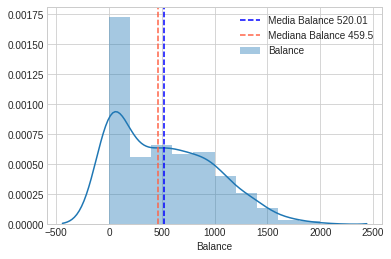

In [8]:
plot_hist(df, 'Balance')

Al visualizar el histograma, podemos observar lo siguiente:
* La distribución es asimétrica positiva
* EL Promedio de deuda en tarjeta de crédito de los usuarios es de 520.01
* El 50% de los usuarios tienen una deuda de crédito menor que o igual a 459.5, mientras que el otro 50% de los usuarios tienen una deuda en tarjeta de crédito mayor que o igual a 459.5.

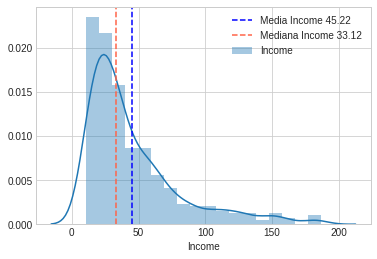

In [9]:
plot_hist(df, 'Income')

Al visualizar el histograma, podemos observar lo siguiente:
* La distribución es asimétrica positiva
* EL Promedio de ingreso anual de los usuarios es de 45.22 (miles de dolares).
* El 50% de los usuarios tienen un ingreso anual menor que o igual a 33.12 (miles de dolares), mientras que el otro 50% de los usuarios tienen ingreso anual mayor que o igual a 33.12 (miles de dolares).

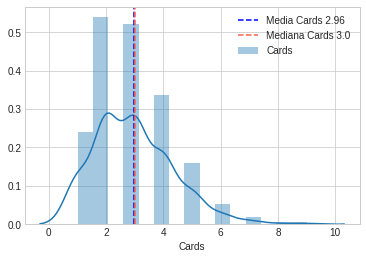

In [10]:
plot_hist(df, 'Cards')

Al visualizar el histograma, podemos observar lo siguiente:
* La distribución es asimétrica positiva
* EL Promedio de cantidad de tarjetas de crédito de los usuario es de 2.96
* El 50% de los usuarios tienen una cantidad de tarjetas de crédito menor que o igual a 3, mientras que el otro 50% de los usuarios tienen una cantidad de tarjeta de crédito mayor que o igual a 3.

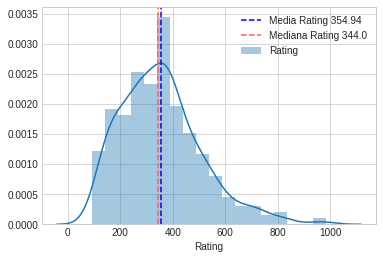

In [11]:
plot_hist(df, 'Rating')

Al visualizar el histograma, podemos observar lo siguiente:
* La distribución es asimétrica positiva
* EL Promedio de ranking del crédito de los usuario es de 354.94
* El 50% de los usuarios tienen un ranking del crédito menor que o igual a 344.0, mientras que el otro 50% de los usuarios tienen un ranking del crédito mayor que o igual a 344.0.

### Desafío 3: Regresión Lineal Simple

* A continuación generaremos una serie de modelos simples:

In [12]:
modelo_1 = smf.ols('Balance ~Student', df).fit()
modelo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           1.49e-07
Time:                        17:03:12   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        480.3694     23.434     20.499      0.000     434.300     526.439
Student[T.Yes]   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
modelo_2 = smf.ols('Balance ~Income', df).fit()
modelo_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           1.03e-22
Time:                        17:03:12   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
modelo_3 = smf.ols('Balance ~Rating', df).fit()
modelo_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Fri, 26 Jun 2020   Prob (F-statistic):          1.90e-120
Time:                        17:03:12   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>¿Qué variable presenta un mayor poder explicativo de la variabilidad de Balance ?</b>

Al ver los <b>R-squared</b> reportados de los distintos modelos generados, podemos afirmar que la variable que presenta un mayor poder explicativo de la variabilidad de <b>Balance</b> seria <b>Rating</b>. Si ejecutamos el modelo <b>'Balance ~Rating'</b>, observamos que el <b>Ranking del crédito</b> de los usuarios explica en un <b>74,6%</b> la variabilidad en el <b>Promedio de deuda en tarjeta de crédito de usuario</b>.

<b>¿Qué podemos decir sobre el comportamiento de Student ?</b>

Si ejecutamos el modelo con una variable binaria de forma <b>'Balance ~Student'</b>, observamos que la variable <b>"¿Es estudiante?"</b> explica en un <b>6,7%</b> la variabilidad en el <b>Promedio de deuda en tarjeta de crédito</b> de los usuarios de la muestra. El intercepto sugiere que para los usuarios que <b>NO SON ESTUDIANTES</b> el <b>Promedio de deuda en tarjeta de crédito</b> es de <b>480.3</b>, mientras que los usuarios que <b>SON ESTUDIANTES</b> presentan una diferencia de <b>396.4</b> "más" en promedio. 

<b>¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de Balance entre aquellos que son y no son estudiantes?</b>

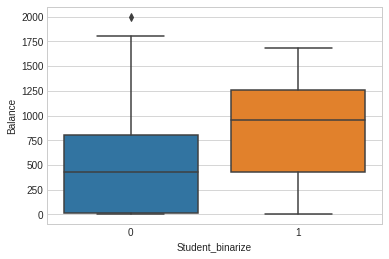

In [15]:
sns.boxplot(x=df['Student_binarize'], y=df['Balance'])

<b>El "Promedio de deuda en tarjeta de crédito" de los usuarios que son estudiantes es mayor a la de los usuarios que NO son estudiantes.</b>

In [16]:
modelo_binario = smf.ols('Balance ~Student_binarize', df).fit()
modelo_binario.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           1.49e-07
Time:                        17:03:13   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          480.3694     23.434     20.499      0.000     434.300     526.439
Student_binarize   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
balance_not_student = 480.3
balance_yes_student = 396.4
prom_usuario_estudiante = balance_not_student + balance_yes_student
prom_usuario_estudiante

876.7

<b>En promedio un usuario estudiante tiene un "promedio de deuda en tarjeta de crédito" de 876.7, en oposición a los 480.3 que perciben los usuarios que no son estudiantes</b>

### Desafío 4: Genere un modelo que incluya todos los regresores

* Comente brevemente sobre el poder explicativo en la varianza de y las principales características de los predictores.

In [18]:
modelo_regresores = smf.ols('Balance ~ Income + Limit + Rating + Cards + Age + Education + Gender_binarize + Student_binarize + Married_binarize + AfricanAmerican_binarize + Asian_binarize', df).fit()
modelo_regresores.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Fri, 26 Jun 2020   Prob (F-statistic):          1.11e-253
Time:                        17:03:13   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 -479.7541     34.717    -13.819      0.000    -548.012    -411.497
Income                      -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Limit                        0.1909      0.033      5.824      0.000       0.126       0.255
Rating                       1.1365      0.491      2.315      0.021       0.171       2.102
Cards                       17.7245      4.341      4.083      0.000       9.190      26.259
Age                         -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education                   -1.0989      1.598     -0.688      0.492      -4.241       2.043
Gender_binarize             10.6532      9.914      1.075      0.283      -8.839      30.145
Student_binarize           425.7474     16.723     25.459      0.000     392.869     458.626
Married_binarize            -8.5339     10.363     -0.824      0.411     -28.908      11.841
AfricanAmerican_binarize   -10.1070     12.210     -0.828      0.408     -34.113      13.899
Asian_binarize               6.6972     12.122      0.552      0.581     -17.137      30.531
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     3.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Si ejecutamos el modelo de forma <b>'Balance ~ Income + Limit + Rating + Cards + Age + Education + Gender_binarize + Student_binarize + Married_binarize + AfricanAmerican_binarize + Asian_binarize'</b>, observamos que todas las variables juntas explica en un <b>95.5%</b> la variabilidad de <b>Balance</b>.

* Podemos observar que los regresores con un estadístico de contraste alto serian Student_binarize, Income, Limit, Cards  y Age
* Podemos observar que los regresores con un valor p mayor a 0.05 serian Education, Gender_binarize, Married_binarize, AfricanAmerican_binarize y Asian_binarize.
* Podemos observar que los regresores con mayor nivel de precisión serian Limit, Rating, Income y Age.

### Desafío 5: Depure el modelo e incluya sólo los predictores significativo

* En base al modelo anterior, refactorize e incluya sólo las variables con un nivel de significancia p-value <= 0.025. Comente brevemente sobre el poder explicativo en la varianza de y las principales características de los predictores.

In [19]:
modelo_regresores_sig = smf.ols('Balance ~ Income + Limit + Rating + Cards + Student_binarize', df).fit()
modelo_regresores_sig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1640.
Date:                Fri, 26 Jun 2020   Prob (F-statistic):          3.60e-261
Time:                        17:03:13   Log-Likelihood:                -2402.8
No. Observations:                 400   AIC:                             4818.
Df Residuals:                     394   BIC:                             4842.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -526.1555     19.747    -26.645      0.000    -564.977    -487.334
Income              -7.8749      0.231    -34.024      0.000      -8.330      -7.420
Limit                0.1944      0.033      5.977      0.000       0.130       0.258
Rating               1.0879      0.487      2.234      0.026       0.130       2.045
Cards               17.8517      4.335      4.118      0.000       9.329      26.374
Student_binarize   426.8501     16.574     25.754      0.000     394.266     459.435
==============================================================================
Omnibus:                       30.263   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.257
Skew:                           0.722   Prob(JB):                     2.21e-08
Kurtosis:                       3.179   Cond. No.                     2.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* ¿Mejoró o empeoró el modelo con la reducción de regresores?

Podemos observar que el modelo disminuyo levemente su <b>R-square</b>. Si ejecutamos el modelo de forma <b>'Balance ~ Income + Limit + Rating + Cards + Student_binarize'</b>, observamos que todas las variables juntas (las mas significativas) explican en un <b>95.4%</b> la variabilidad de Balance.

### Desafío 6

* Utilizando lmplot de seaborn , inspeccione el comportamiento de los tres principales determinantes.

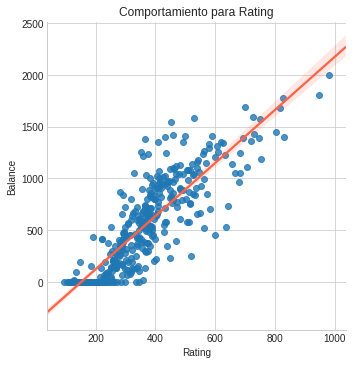

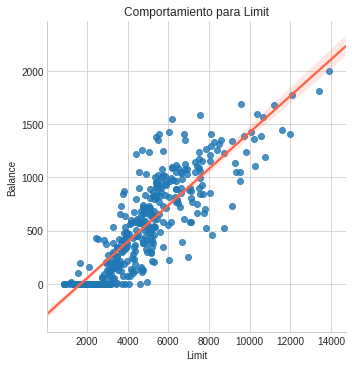

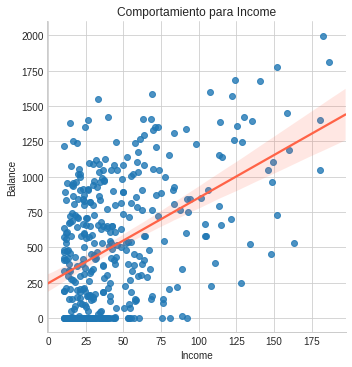

In [20]:
principales_determinantes = ['Rating','Limit','Income']
for regresor in principales_determinantes:    
    sns.lmplot(x=regresor, y='Balance', data=df, fit_reg=True, line_kws={'color':'tomato'}, height=5)
    plt.title('Comportamiento para {}'.format(regresor))
    plt.show()

A simple vista, podemos observar que los gráficos nos enseñan que en la medida que nuestros regresores van aumentando en la escala, el "Promedio de deuda en tarjeta de crédito de usuario" aumenta (asociación positiva entre ambas variables)